In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../../Resources/ML_Ready_Data/total_crime_adhoc.csv")

In [3]:
from scipy import stats
def normality_clean(df, z, col):
    #check if col parameter is priovided
    if col != None:
        df = df.loc[df[col] > 0]
        print("FYI, this is gonna drop dummies with 0 values")
    #drop all n_bound outliers
    df = df[(np.abs(stats.zscore(df)) < z).all(axis=1)]
    return df

In [4]:
df_norm = normality_clean(df, 3, "total_crime_10k")

FYI, this is gonna drop dummies with 0 values


In [5]:
def prep_X_y(df, y_col):
    X = df.drop([y_col, "fips_state_county_code"], axis=1)
    y = df[y_col]
    return X, y

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
def random_forest_regressor(dataset, y_val):
    X, y = prep_X_y(dataset, y_val)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    reg = RandomForestRegressor(n_estimators=250, max_leaf_nodes=250, random_state=42)
    reg.fit(X_train, y_train)
    print(f'train: {reg.score(X_train, y_train)} test: {reg.score(X_test, y_test)}')
    plt.scatter(y_train, reg.predict(X_train), color='blue')
    plt.scatter(y_test, reg.predict(X_test), color='red')
    plt.show()
    print("--------------------")

train: 0.836389919093589 test: 0.22241985974941536


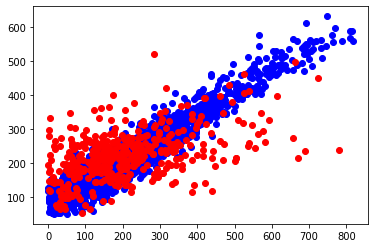

--------------------


In [7]:
random_forest_regressor(df_norm, "total_crime_10k")

In [8]:
X, y = prep_X_y(df_norm, "total_crime_10k")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
for i in range (100, 250, 10):
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    reg = RandomForestRegressor(n_estimators=100, max_leaf_nodes=i, random_state=42)
    reg.fit(X_train, y_train)
    print(f'For {i} leaf nodes:::: train: {reg.score(X_train, y_train)} test: {reg.score(X_test, y_test)}')
    # plt.scatter(y_train, reg.predict(X_train), color='blue')
    # plt.show()
    print("--------------------")

For 100 leaf nodes:::: train: 0.6688363291050374 test: 0.22294287613964658
--------------------
For 110 leaf nodes:::: train: 0.6898132591679651 test: 0.22088706344420417
--------------------
For 120 leaf nodes:::: train: 0.7079662526363184 test: 0.22231885657258554
--------------------
For 130 leaf nodes:::: train: 0.7241006880784884 test: 0.22406935161926667
--------------------
For 140 leaf nodes:::: train: 0.7381670071976204 test: 0.22401684205192696
--------------------
For 150 leaf nodes:::: train: 0.75123164088613 test: 0.22371967056285402
--------------------
For 160 leaf nodes:::: train: 0.7630233007306179 test: 0.22368183965463584
--------------------
For 170 leaf nodes:::: train: 0.7739303529131307 test: 0.22511346072083516
--------------------
For 180 leaf nodes:::: train: 0.7840527209890426 test: 0.22507629154581987
--------------------
For 190 leaf nodes:::: train: 0.7929525496657177 test: 0.22582689952315682
--------------------
For 200 leaf nodes:::: train: 0.8012253110